In [ ]:
import backtest_stock as bs

In [ ]:
bs.start()

start
NIFTY
startdate 2018-06-15
updated data present
malist 70 60
lastvalue 1159154.9999999998
totaliterations 63
malist 71 60
lastvalue 1200750.0
totaliterations 53
malist 72 60
lastvalue 1197929.9999999998
totaliterations 53
malist 73 60
lastvalue 1212364.9999999998
totaliterations 53
malist 74 60
lastvalue 1214175.0
totaliterations 49
malist 75 60
lastvalue 1229275.0
totaliterations 45
malist 76 60
lastvalue 1236995.0
totaliterations 39
malist 77 60
lastvalue 1205610.0
totaliterations 39
malist 78 60
lastvalue 1182039.9999999998
totaliterations 41
malist 79 60
lastvalue 1180775.0
totaliterations 35
malist 70 61
lastvalue 1138234.9999999998
totaliterations 63
malist 71 61
lastvalue 1138605.0000000002
totaliterations 61
malist 72 61
lastvalue 1194574.9999999998
totaliterations 51
malist 73 61
lastvalue 1199785.0
totaliterations 49
malist 74 61
lastvalue 1191845.0
totaliterations 53
malist 75 61
lastvalue 1188010.0
totaliterations 47
malist 76 61
lastvalue 1225535.0
totaliterations 45

In [ ]:
import os
os._exit(00)

SYNDIBANK_F1
startdate 2007-01-01
updated data present
                     Close   Open   High    Low  Volume      RSI20     BBu_10  \
Date                                                                            
2016-11-03 10:07:00  71.60  71.65  71.65  71.60   18000  57.588505  71.863058   
2016-11-03 10:10:00  71.55  71.55  71.55  71.55    9000  55.728136  71.837682   
2016-11-03 10:11:00  71.60  71.55  71.60  71.55   27000  57.184081  71.787764   

                           BBl       BBs    MA100      MA400  
Date                                                          
2016-11-03 10:07:00  71.246942  0.616117  71.1825  72.540125  
2016-11-03 10:10:00  71.322318  0.515364  71.1845  72.534000  
2016-11-03 10:11:00  71.432236  0.355528  71.1855  72.528125  
MA400
NIFTY
startdate 2018-06-15
updated data present
              Close     Open     High      Low     Volume      RSI20  \
Date                                                                   
2008-08-08  4529.50  4518.

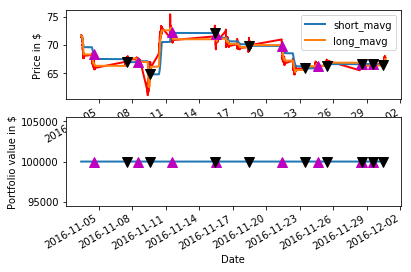

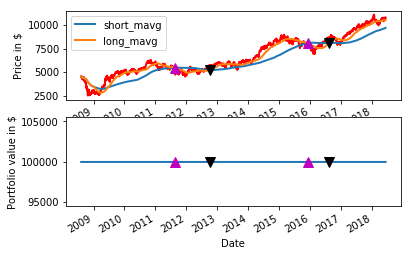

In [4]:
from property import *
from stockprediction.technicalanalysis import ta
import stockprediction.reporting as fr
from stockprediction import ma_crossover as mc
from utility import filterframe as ff
from backtest import ma_cross_strategy as btmc
import matplotlib.pyplot as plt
import pandas as pd
import os
import property as p

def exe_ma_crossover(symbol):
    b = ta(symbol)
    data = b.get_panel_data()

    def_features = b.def_features
    if b.featuredict:
        skip_days = sorted([(sorted(v).pop()) for k, v in b.featuredict.items()]).pop()
    else:
        skip_days = 0

    def funcseries(x):
        t = mc.ma_crossover(def_features, int(x), symbol)
        for k, v in data.items():
            dataframe=v
            dataframe = ff.filtered_frame(dataframe,400)  # Get df wihout nan, outliers
            #symbol='NIFTY'
            print(dataframe.head(3))
            
            header=dataframe.columns.tolist()#[-1::-1]
            malist = []

            for i in range(len(header)):
                h=header[i]
                if h.startswith('MA'):
                    malist.append(int(h[2:]))
            print(h)
                
            sorted(h,reverse=True)
            bars=dataframe
            mac = btmc.MovingAverageCrossStrategy(symbol, bars, short_window=malist[1], long_window=malist[0])
            signals = mac.generate_signals()
            
            portfolio = btmc.MarketOnClosePortfolio(symbol, bars, signals, initial_capital=100000.0)
            returns = portfolio.backtest_portfolio()
            
            # Plot two charts to assess trades and equity curve
            fig = plt.figure()
            fig.patch.set_facecolor('white')  # Set the outer colour to white
            ax1 = fig.add_subplot(211, ylabel='Price in $')
            
            # Plot the AAPL closing price overlaid with the moving averages
            bars['Close'].plot(ax=ax1, color='r', lw=2.)
            signals[['short_mavg', 'long_mavg']].plot(ax=ax1, lw=2.)
            
            # Plot the "buy" trades against AAPL
            ax1.plot(signals.ix[signals.positions == 1.0].index,
                     signals.short_mavg[signals.positions == 1.0],
                     '^', markersize=10, color='m')
            
            # Plot the "sell" trades against AAPL
            ax1.plot(signals.ix[signals.positions == -1.0].index,
                     signals.short_mavg[signals.positions == -1.0],
                     'v', markersize=10, color='k')
            
            # Plot the equity curve in dollars
            ax2 = fig.add_subplot(212, ylabel='Portfolio value in $')
            returns['total'].plot(ax=ax2, lw=2.)
            
            # Plot the "buy" and "sell" trades against the equity curve
            ax2.plot(returns.ix[signals.positions == 1.0].index,
                     returns.total[signals.positions == 1.0],
                     '^', markersize=10, color='m')
            ax2.plot(returns.ix[signals.positions == -1.0].index,
                     returns.total[signals.positions == -1.0],
                     'v', markersize=10, color='k')
            
            # Plot the figure
            fig.show()

            
            

    # list(map(funcseries, b.predict_days))
    funcseries(1)

def run_ma_crossover():
    #fr.create_reportfile(reportpath, reportcol)
    #warnings.filterwarnings("ignore")
    try:
        noninddf = pd.Series(nonindlist)
        indlistdf = pd.Series(indlist)
        noninddf.apply(exe_ma_crossover)
        indlistdf.apply(exe_ma_crossover)

    except Exception as e:
        print(e)


if __name__ == '__main__':
    run_ma_crossover()


NameError: name 'dataframe' is not defined

Open
High
Low
Close
Volume
Turnover


IndexError: list index out of range